# Classifier Notebook



In [7]:
%load_ext tensorboard
logdir = '../raw_data/logs/long_train'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
from os import environ
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
import numpy as np
from tensorflow.keras import Sequential, layers
import os
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import os
import tensorflow.keras


In [3]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
def blur_func(img,k=5):
    ksize = (k, k)
    blur = cv2.blur(img, ksize) 
    return blur

In [4]:
simple_data = ImageDataGenerator(rescale = 1./255)

x_val = simple_data.flow_from_directory('../raw_data/images/validation/',
                                                    batch_size=32,
                                                   classes = ['no_dunes',
                                                             'dunes'],
                                                    class_mode='binary',
                                                    color_mode="grayscale",
                                                    target_size=(256, 256))

augmented_data = ImageDataGenerator(rescale=1./255,
                                    brightness_range=(.5,1.5))

aug_generator = augmented_data.flow_from_directory('../raw_data/images/training/',
                                                    batch_size=32,
                                                   classes = ['no_dunes',
                                                             'dunes'],
                                                    class_mode='binary',
                                                    color_mode="grayscale",
                                                    target_size=(256, 256))

Found 7896 images belonging to 2 classes.
Found 488672 images belonging to 2 classes.


In [16]:
aug_generator.class_indices

{'no_dunes': 0, 'dunes': 1}

In [5]:
def setup_model(dropout_rate=0.5, rate_fact=1):
    model = Sequential()
    model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(256,256,1)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Dropout(.2))
    dropout_rate = dropout_rate/rate_fact
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Dropout(.8))
    dropout_rate = dropout_rate/rate_fact
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Dropout(.5))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Dropout(.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    print(model.summary())
    
    return model
 

In [6]:
def compile(model):

    adam_opt = optimizers.Adam(learning_rate= 0.0005922448979591837)
    model.compile(loss='binary_crossentropy', 
              optimizer=adam_opt,
              metrics=['accuracy', 'Precision', 'Recall'])
    
    return model

In [8]:
experiments = [(0.2,1.0,'20_percent'),(0.5,1.0,'55_percent'),(.5,2.2,'adaptative')]
histories=[]



for rate, factor, name in experiments:

    es = EarlyStopping(monitor = 'val_loss', patience = 40, restore_best_weights = True, verbose = True)
    mc = ModelCheckpoint('best_model.h5',save_best_only=True)
    tb = TensorBoard(log_dir=f'{logdir}/{name}', histogram_freq=1)
    model = setup_model(dropout_rate=rate, rate_fact=factor)
    model = compile(model)
    print(f'Now training model {name}')
    history = model.fit(aug_generator,
          epochs=500,
          verbose=1,
          validation_data = x_val,
          callbacks = [mc, es, tb]
          )
    histories.append(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        1

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_val, verbose = 1)

734/734 [==============================] - 14s 19ms/step - loss: 0.1222 - accuracy: 0.9567 - precision: 0.9418 - recall: 0.9757


[0.12224973738193512,
 0.9566513299942017,
 0.9417616128921509,
 0.975731372833252]

In [ ]:
Epoch 1/500
25356/25356 [==============================] - 7519s 297ms/step - loss: 0.1856 - accuracy: 0.9279 - precision: 0.9367 - recall: 0.9179 - val_loss: 0.2783 - val_accuracy: 0.8675 - val_precision: 0.9142 - val_recall: 0.8092
Epoch 2/500
25356/25356 [==============================] - 7511s 296ms/step - loss: 0.1101 - accuracy: 0.9595 - precision: 0.9647 - recall: 0.9538 - val_loss: 0.7415 - val_accuracy: 0.7708 - val_precision: 0.7306 - val_recall: 0.8535
Epoch 3/500
25356/25356 [==============================] - 7539s 297ms/step - loss: 0.0884 - accuracy: 0.9683 - precision: 0.9731 - recall: 0.9633 - val_loss: 0.2283 - val_accuracy: 0.9189 - val_precision: 0.8886 - val_recall: 0.9566
Epoch 4/500
25356/25356 [==============================] - 7526s 297ms/step - loss: 0.0788 - accuracy: 0.9722 - precision: 0.9768 - recall: 0.9673 - val_loss: 0.3026 - val_accuracy: 0.8826 - val_precision: 0.9032 - val_recall: 0.8553
Epoch 5/500
25356/25356 [==============================] - 7504s 296ms/step - loss: 0.0740 - accuracy: 0.9742 - precision: 0.9783 - recall: 0.9700 - val_loss: 0.1677 - val_accuracy: 0.9321 - val_precision: 0.9546 - val_recall: 0.9064
Epoch 6/500
25356/25356 [==============================] - 7540s 297ms/step - loss: 0.0686 - accuracy: 0.9763 - precision: 0.9802 - recall: 0.9723 - val_loss: 0.2394 - val_accuracy: 0.9127 - val_precision: 0.9567 - val_recall: 0.8634
Epoch 7/500
25356/25356 [==============================] - 7541s 297ms/step - loss: 0.0655 - accuracy: 0.9773 - precision: 0.9811 - recall: 0.9733 - val_loss: 0.1863 - val_accuracy: 0.9272 - val_precision: 0.9655 - val_recall: 0.8851
Epoch 8/500
25356/25356 [==============================] - 7655s 302ms/step - loss: 0.0626 - accuracy: 0.9785 - precision: 0.9821 - recall: 0.9748 - val_loss: 0.1722 - val_accuracy: 0.9274 - val_precision: 0.9849 - val_recall: 0.8671
Epoch 9/500
25356/25356 [==============================] - 7606s 300ms/step - loss: 0.0629 - accuracy: 0.9786 - precision: 0.9820 - recall: 0.9750 - val_loss: 0.3395 - val_accuracy: 0.8545 - val_precision: 0.9762 - val_recall: 0.7249
Epoch 10/500
25356/25356 [==============================] - 7614s 300ms/step - loss: 0.0592 - accuracy: 0.9797 - precision: 0.9831 - recall: 0.9762 - val_loss: 0.1523 - val_accuracy: 0.9378 - val_precision: 0.9757 - val_recall: 0.8971
Epoch 11/500
25356/25356 [==============================] - 7613s 300ms/step - loss: 0.0603 - accuracy: 0.9803 - precision: 0.9840 - recall: 0.9766 - val_loss: 0.1332 - val_accuracy: 0.9547 - val_precision: 0.9506 - val_recall: 0.9588
Epoch 12/500
25356/25356 [==============================] - 7624s 301ms/step - loss: 0.0568 - accuracy: 0.9810 - precision: 0.9842 - recall: 0.9776 - val_loss: 0.3120 - val_accuracy: 0.8793 - val_precision: 0.9826 - val_recall: 0.7708
Epoch 13/500
25356/25356 [==============================] - 7595s 300ms/step - loss: 0.0562 - accuracy: 0.9810 - precision: 0.9841 - recall: 0.9779 - val_loss: 0.1711 - val_accuracy: 0.9355 - val_precision: 0.9683 - val_recall: 0.8996
Epoch 14/500
25356/25356 [==============================] - 7557s 298ms/step - loss: 0.0540 - accuracy: 0.9817 - precision: 0.9849 - recall: 0.9784 - val_loss: 0.1463 - val_accuracy: 0.9431 - val_precision: 0.9704 - val_recall: 0.9133
Epoch 15/500
25356/25356 [==============================] - 7557s 298ms/step - loss: 0.0539 - accuracy: 0.9817 - precision: 0.9848 - recall: 0.9785 - val_loss: 0.1925 - val_accuracy: 0.9224 - val_precision: 0.9454 - val_recall: 0.8956
Epoch 16/500
25356/25356 [==============================] - 7590s 299ms/step - loss: 0.0552 - accuracy: 0.9815 - precision: 0.9849 - recall: 0.9780 - val_loss: 0.1652 - val_accuracy: 0.9300 - val_precision: 0.9786 - val_recall: 0.8783
Epoch 17/500
25356/25356 [==============================] - 7673s 303ms/step - loss: 0.0523 - accuracy: 0.9820 - precision: 0.9851 - recall: 0.9788 - val_loss: 0.2155 - val_accuracy: 0.9107 - val_precision: 0.9646 - val_recall: 0.8516
Epoch 18/500
25356/25356 [==============================] - 8007s 316ms/step - loss: 0.0568 - accuracy: 0.9811 - precision: 0.9847 - recall: 0.9773 - val_loss: 0.1548 - val_accuracy: 0.9367 - val_precision: 0.9604 - val_recall: 0.9102
Epoch 19/500
25356/25356 [==============================] - 7620s 301ms/step - loss: 0.0541 - accuracy: 0.9821 - precision: 0.9855 - recall: 0.9787 - val_loss: 0.1880 - val_accuracy: 0.9233 - val_precision: 0.9746 - val_recall: 0.8683
Epoch 20/500
25356/25356 [==============================] - 7614s 300ms/step - loss: 0.0520 - accuracy: 0.9826 - precision: 0.9857 - recall: 0.9793 - val_loss: 0.1884 - val_accuracy: 0.9427 - val_precision: 0.9732 - val_recall: 0.9099
Epoch 21/500
25356/25356 [==============================] - 7840s 309ms/step - loss: 0.0527 - accuracy: 0.9822 - precision: 0.9854 - recall: 0.9789 - val_loss: 0.2700 - val_accuracy: 0.9032 - val_precision: 0.9751 - val_recall: 0.8262
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping

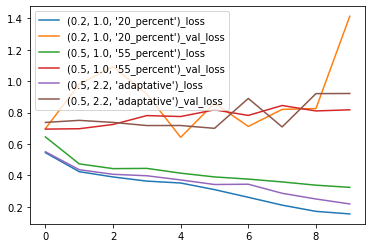

In [30]:

for experiment,history in zip(experiments, histories):
    name = experiment[2]
    plt.plot(history.history['loss'],label=f'{experiment}_loss')
    plt.plot(history.history['val_loss'],label=f'{experiment}_val_loss')
plt.legend()

In [ ]:
%tensorboard --logdir logs

In [8]:
es = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True, verbose = True)
mc = ModelCheckpoint('best_model.h5',save_best_only=True)
tb = TensorBoard(log_dir=f'{logdir}/best', histogram_freq=1)
model = setup_model(dropout_rate=.5, rate_fact=1)
model = compile(model)
history = model.fit(aug_generator,
          epochs=10,
          verbose=1,
          validation_data = x_val,
          callbacks = [mc, es, tb]
          )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        1

In [34]:
history.history['loss']

[0.5506487488746643,
 0.4360262155532837,
 0.40668120980262756,
 0.39736485481262207,
 0.370868444442749,
 0.34169742465019226,
 0.3434922993183136,
 0.2856542468070984,
 0.24931243062019348,
 0.21775884926319122]